# 1. Business Case Evaluation:

The business case comprise of using NYC housing sales data for exploratory data analysis (EDA) and 
linear regression analysis. This case study aims to inform strategic decisions regarding real estate 
investment, urban planning and policymaking via ongoing property sales, factors influencing prices, 
and forecasting future growth of New York. The potential advantages 
include improved market understanding, customized financing strategies and informed policymaking in real state.

# 2. Data Identification

Data identification mainly focuses on identifying and understanding the data types, sources, and characteristics of available data related to a New York Housing. So, we are identifying the most needed data, identifying features possible outcomes, evaluate the quality of the data, and understand any limitations or limitations of New York Housing Data. We are taking the New York housing Data from Kaggle.

# 3. Data Acquisition & Filtering

We have access data from https://www.kaggle.com/datasets/new-york-city/nyc-property-sales.

# 4.Data Extraction

In [3]:
#import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#reading the data in csv format

NewYork_data=pd.read_csv("nyc-rolling-sales.csv")

# 5.DATA VALIDATION AND CLEANSING

In [5]:
#displaying information about the data including index dtype and columns, non nulls values and memory usage

NewYork_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [6]:
#identifying the number of rows and columns

NewYork_data.shape

(84548, 22)

In [7]:
#displaying five 5 rows of the dataframe

NewYork_data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [8]:
#displaying last 5 rows of the dataframe

NewYork_data.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [9]:
#summary of the dataset

NewYork_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,84548.0,10344.359878,7151.779436,4.0,4231.00,8942.0,15987.25,26739.0
BOROUGH,84548.0,2.998758,1.289790,1.0,2.00,3.0,4.00,5.0
BLOCK,84548.0,4237.218976,3568.263407,1.0,1322.75,3311.0,6281.00,16322.0
LOT,84548.0,376.224015,658.136814,1.0,22.00,50.0,1001.00,9106.0
ZIP CODE,84548.0,10731.991614,1290.879147,0.0,10305.00,11209.0,11357.00,11694.0
RESIDENTIAL UNITS,84548.0,2.025264,16.721037,0.0,0.00,1.0,2.00,1844.0
COMMERCIAL UNITS,84548.0,0.193559,8.713183,0.0,0.00,0.0,0.00,2261.0
TOTAL UNITS,84548.0,2.249184,18.972584,0.0,1.00,1.0,2.00,2261.0
YEAR BUILT,84548.0,1789.322976,537.344993,0.0,1920.00,1940.0,1965.00,2017.0
TAX CLASS AT TIME OF SALE,84548.0,1.657485,0.819341,1.0,1.00,2.0,2.00,4.0


In [10]:
#to check the data types of columns

NewYork_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [11]:
#dropping unwanted columns

NewYork_data.drop(columns = ['Unnamed: 0'], inplace = True)

In [12]:
#converting 'SALE DATE' column to datetime format

NewYork_data['SALE DATE'] = pd.to_datetime(NewYork_data['SALE DATE'])

In [13]:
#converting 'SALE DATE' column to datetime format

NewYork_data['SALE DATE'] 

0       2017-07-19
1       2016-12-14
2       2016-12-09
3       2016-09-23
4       2016-11-17
           ...    
84543   2016-11-28
84544   2017-04-21
84545   2017-07-05
84546   2016-12-21
84547   2016-10-27
Name: SALE DATE, Length: 84548, dtype: datetime64[ns]

In [14]:
#identifying columns with 'object' datatype

print(NewYork_data.select_dtypes(['object']).columns)

Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE'],
      dtype='object')


In [15]:
#identifying columns with 'int64' datatype

print(NewYork_data.select_dtypes(['int64']).columns)

Index(['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE'],
      dtype='object')


In [16]:
#coverting some columns from 'object' datatype to 'category' datatype

object_category = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'BUILDING CLASS AT TIME OF SALE']

for colname in object_category:
    NewYork_data[colname] = NewYork_data[colname].astype('category') 

In [17]:
#coverting some columns from 'int64' datatype to 'category' datatype

num_category = ['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE','TAX CLASS AT TIME OF SALE']

for colname in num_category:
    NewYork_data[colname] = NewYork_data[colname].astype('category')  

In [18]:
#converting columns to lowercase for easier access

NewYork_data.columns= NewYork_data.columns.str.lower()
NewYork_data.columns

Index(['borough', 'neighborhood', 'building class category',
       'tax class at present', 'block', 'lot', 'ease-ment',
       'building class at present', 'address', 'apartment number', 'zip code',
       'residential units', 'commercial units', 'total units',
       'land square feet', 'gross square feet', 'year built',
       'tax class at time of sale', 'building class at time of sale',
       'sale price', 'sale date'],
      dtype='object')

In [19]:
#converting 'land square feet','gross square feet' and  'sale price' to numeric

numeric = ['land square feet','gross square feet', 'sale price']
for col in numeric: # coerce for missing values    
    NewYork_data[col] = pd.to_numeric(NewYork_data[col], errors='coerce')

In [20]:
#filling black spaces with '-'

NewYork_data.columns = NewYork_data.columns.str.replace(' ', '_')

In [21]:
#set numerical indicators for boroughs as type str to distinguish boroughs 

NewYork_data['borough'] = NewYork_data['borough'].astype(str)
NewYork_data['borough'] = NewYork_data['borough'].str.replace("1", "Manhattan")
NewYork_data['borough'] = NewYork_data['borough'].str.replace("2", "Bronx")
NewYork_data['borough'] = NewYork_data['borough'].str.replace("3", "Brooklyn")
NewYork_data['borough'] = NewYork_data['borough'].str.replace("4", "Queens")
NewYork_data['borough'] = NewYork_data['borough'].str.replace("5", "Staten Island")

In [22]:
#displaying the information about the dataframe

NewYork_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   borough                         84548 non-null  object        
 1   neighborhood                    84548 non-null  category      
 2   building_class_category         84548 non-null  category      
 3   tax_class_at_present            84548 non-null  category      
 4   block                           84548 non-null  category      
 5   lot                             84548 non-null  category      
 6   ease-ment                       84548 non-null  category      
 7   building_class_at_present       84548 non-null  category      
 8   address                         84548 non-null  category      
 9   apartment_number                84548 non-null  category      
 10  zip_code                        84548 non-null  category      
 11  re

In [23]:
#identifying the sum of null values

NewYork_data.isnull().sum()

borough                               0
neighborhood                          0
building_class_category               0
tax_class_at_present                  0
block                                 0
lot                                   0
ease-ment                             0
building_class_at_present             0
address                               0
apartment_number                      0
zip_code                              0
residential_units                     0
commercial_units                      0
total_units                           0
land_square_feet                  26252
gross_square_feet                 27612
year_built                            0
tax_class_at_time_of_sale             0
building_class_at_time_of_sale        0
sale_price                        14561
sale_date                             0
dtype: int64

In [24]:
#dropping missing rows

NewYork_data1 = NewYork_data.dropna()

In [25]:
NewYork_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   borough                         84548 non-null  object        
 1   neighborhood                    84548 non-null  category      
 2   building_class_category         84548 non-null  category      
 3   tax_class_at_present            84548 non-null  category      
 4   block                           84548 non-null  category      
 5   lot                             84548 non-null  category      
 6   ease-ment                       84548 non-null  category      
 7   building_class_at_present       84548 non-null  category      
 8   address                         84548 non-null  category      
 9   apartment_number                84548 non-null  category      
 10  zip_code                        84548 non-null  category      
 11  re

### MISSING VALUES

In [26]:
#identifying the sum of null values

NewYork_data.isnull().sum()

borough                               0
neighborhood                          0
building_class_category               0
tax_class_at_present                  0
block                                 0
lot                                   0
ease-ment                             0
building_class_at_present             0
address                               0
apartment_number                      0
zip_code                              0
residential_units                     0
commercial_units                      0
total_units                           0
land_square_feet                  26252
gross_square_feet                 27612
year_built                            0
tax_class_at_time_of_sale             0
building_class_at_time_of_sale        0
sale_price                        14561
sale_date                             0
dtype: int64

In [27]:
#identifying percentage of null values

NewYork_data.isnull().sum()/len(NewYork_data)*100

borough                            0.000000
neighborhood                       0.000000
building_class_category            0.000000
tax_class_at_present               0.000000
block                              0.000000
lot                                0.000000
ease-ment                          0.000000
building_class_at_present          0.000000
address                            0.000000
apartment_number                   0.000000
zip_code                           0.000000
residential_units                  0.000000
commercial_units                   0.000000
total_units                        0.000000
land_square_feet                  31.049818
gross_square_feet                 32.658372
year_built                         0.000000
tax_class_at_time_of_sale          0.000000
building_class_at_time_of_sale     0.000000
sale_price                        17.222170
sale_date                          0.000000
dtype: float64

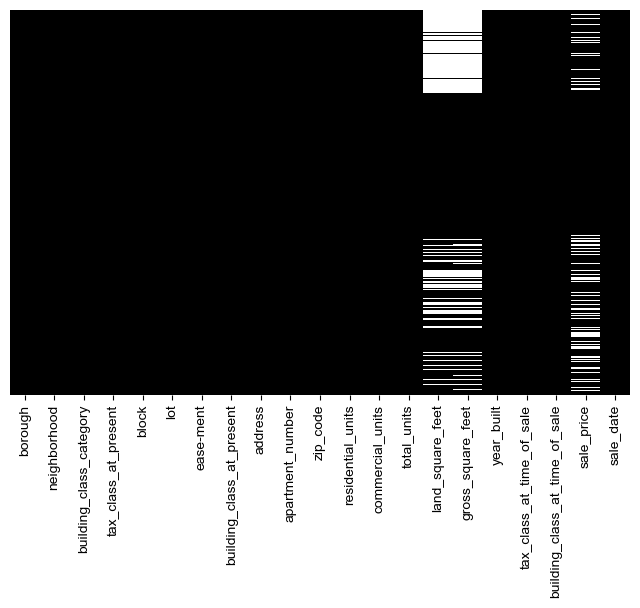

In [28]:
# Visualizing missing values

fig, ax = plt.subplots(figsize=(8,5))
sns.set(font_scale=1)
sns.heatmap(NewYork_data.isnull(),yticklabels = False, cbar = False, cmap = 'Greys_r')
plt.show()

In [29]:
#dropping rows with missing values

NewYork_data = NewYork_data.dropna()

In [30]:
# Recheck the count of missing values

NewYork_data.isnull().sum()

borough                           0
neighborhood                      0
building_class_category           0
tax_class_at_present              0
block                             0
lot                               0
ease-ment                         0
building_class_at_present         0
address                           0
apartment_number                  0
zip_code                          0
residential_units                 0
commercial_units                  0
total_units                       0
land_square_feet                  0
gross_square_feet                 0
year_built                        0
tax_class_at_time_of_sale         0
building_class_at_time_of_sale    0
sale_price                        0
sale_date                         0
dtype: int64

In [31]:
#summarizing the dataframe

NewYork_data.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,min,25%,50%,75%,max,std
residential_units,48244.00000,2.56654,0.00000,1.00000,1.00000,2.00000,1844.00000,17.46548
commercial_units,48244.00000,0.24917,0.00000,0.00000,0.00000,0.00000,2261.00000,10.98807
total_units,48244.00000,2.83463,0.00000,1.00000,1.00000,2.00000,2261.00000,20.75042
land_square_feet,48244.00000,3358.11655,0.00000,1413.00000,2140.00000,3071.00000,4228300.00000,31435.89670
gross_square_feet,48244.00000,3669.75253,0.00000,828.00000,1620.00000,2520.00000,3750565.00000,29474.91185
year_built,48244.00000,1827.76517,0.00000,1920.00000,1931.00000,1961.00000,2017.00000,464.36115
sale_price,48244.00000,1153281.44582,0.00000,80420.00000,480000.00000,830000.00000,2210000000.00000,13401309.19358
sale_date,48244.00000,.5f,.5f,.5f,.5f,.5f,.5f,nan


### OUTLIERS

In [32]:
#check dataframe where year_built is 0 years

NewYork_data[NewYork_data['year_built']==0]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
18364,Bronx,BATHGATE,29 COMMERCIAL GARAGES,4,2918,29,,G7,1885 BATHGATE AVENUE,,...,0,0,0,3070.0,0.0,0,4,G7,2500000.0,2016-12-15
18371,Bronx,BATHGATE,31 COMMERCIAL VACANT LAND,4,3028,13,,V9,1996 WEBSTER AVENUE,,...,0,0,0,5945.0,0.0,0,4,V9,1200000.0,2016-10-19
18373,Bronx,BATHGATE,41 TAX CLASS 4 - OTHER,4,2900,1,,Z9,1816 WEBSTER AVENUE,,...,0,0,0,3082.0,0.0,0,4,Z9,300000.0,2016-11-03
18756,Bronx,BAYCHESTER,05 TAX CLASS 1 VACANT LAND,1B,4725,26,,V0,1475 HICKS STREET,,...,0,0,0,2375.0,0.0,0,1,V0,98000.0,2016-10-31
18757,Bronx,BAYCHESTER,05 TAX CLASS 1 VACANT LAND,1B,4726,38,,V0,3552 EASTCHESTER ROAD,,...,0,0,0,3400.0,0.0,0,1,V0,0.0,2017-03-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53841,Queens,CORONA,07 RENTALS - WALKUP APARTMENTS,2B,1785,22,,C1,112-48 38TH AVENUE,,...,8,0,8,2500.0,6875.0,0,2,C1,2153222.0,2017-05-10
54054,Queens,CORONA,41 TAX CLASS 4 - OTHER,4,1961,1,,Z9,5506 VAN CLEEF STREET,,...,0,0,0,926.0,384.0,0,4,Z9,113000.0,2017-08-09
57321,Queens,FLUSHING-NORTH,08 RENTALS - ELEVATOR APARTMENTS,2B,5186,56,,D3,142-11 CHERRY AVENUE,,...,10,0,10,2850.0,10111.0,0,2,D3,4000000.0,2017-05-19
65906,Queens,LITTLE NECK,01 ONE FAMILY DWELLINGS,1,8229,80,,A3,45-39 BROWVALE LANE,,...,1,0,1,9562.0,5291.0,0,1,A3,1731025.0,2017-04-06


In [33]:
#remove rows where year_built = 0

NewYork_data= NewYork_data[NewYork_data['year_built']!=0]
NewYork_data

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


In [34]:
#double-check if 'sale_price' has not null values

NewYork_data = NewYork_data[NewYork_data['sale_price'].notnull()]
len(NewYork_data)

45333

In [35]:
#double-check if 'land_square_feet' has not null values

NewYork_data = NewYork_data[NewYork_data['land_square_feet'].notnull()]
len(NewYork_data)

45333

In [36]:
#double-check if 'gross_square_feet' has not null values

NewYork_data = NewYork_data[NewYork_data['gross_square_feet'].notnull()]
len(NewYork_data)

45333

In [37]:
#romoving rows where 'land_square_feet'is 0

NewYork_data[NewYork_data['land_square_feet']==0]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
18354,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH STREET, 6E",,...,0,0,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17
18355,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH ST, 6B",,...,0,0,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17
18356,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3044,40,,D4,"495 E 178TH STREET, 2H",,...,0,0,0,0.0,0.0,1941,2,D4,60000.0,2016-12-01
18746,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1009,,R3,2877 ELY AVENUE,3,...,1,0,1,0.0,0.0,2008,1,R3,310000.0,2017-02-28
18747,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1027,,R3,2853 ELY AVENUE,3,...,1,0,1,0.0,0.0,2008,1,R3,342500.0,2017-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49292,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,,RP,207 PROSPECT PARK SW,P35,...,0,0,1,0.0,0.0,1990,4,RP,0.0,2017-07-25
49293,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,,RP,207 PROSPECT PARK SW,P35,...,0,0,1,0.0,0.0,1990,4,RP,0.0,2017-07-17
49294,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1213,,RS,11 TERRACE PLACE,S2,...,0,0,1,0.0,0.0,2006,4,RS,0.0,2016-10-06
49295,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1219,,RS,11 TERRACE PLACE,S8,...,0,0,1,0.0,0.0,2006,4,RS,0.0,2016-10-24


In [38]:
#romoving rows where 'gross_square_feet'is 0

NewYork_data[NewYork_data['gross_square_feet']==0]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
18354,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH STREET, 6E",,...,0,0,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17
18355,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH ST, 6B",,...,0,0,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17
18356,Bronx,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3044,40,,D4,"495 E 178TH STREET, 2H",,...,0,0,0,0.0,0.0,1941,2,D4,60000.0,2016-12-01
18746,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1009,,R3,2877 ELY AVENUE,3,...,1,0,1,0.0,0.0,2008,1,R3,310000.0,2017-02-28
18747,Bronx,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1027,,R3,2853 ELY AVENUE,3,...,1,0,1,0.0,0.0,2008,1,R3,342500.0,2017-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49292,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,,RP,207 PROSPECT PARK SW,P35,...,0,0,1,0.0,0.0,1990,4,RP,0.0,2017-07-25
49293,Brooklyn,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,,RP,207 PROSPECT PARK SW,P35,...,0,0,1,0.0,0.0,1990,4,RP,0.0,2017-07-17
49294,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1213,,RS,11 TERRACE PLACE,S2,...,0,0,1,0.0,0.0,2006,4,RS,0.0,2016-10-06
49295,Brooklyn,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1219,,RS,11 TERRACE PLACE,S8,...,0,0,1,0.0,0.0,2006,4,RS,0.0,2016-10-24


In [39]:
# Remove outliers of zero gross square feet and land square feet

NewYork_data = NewYork_data[NewYork_data['land_square_feet'] != 0]
NewYork_data = NewYork_data[NewYork_data['gross_square_feet'] != 0]

# Confirm removals

NewYork_data.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,min,25%,50%,75%,max,std
residential_units,36805.00000,3.18209,0.00000,1.00000,2.00000,2.00000,1844.00000,19.82145
commercial_units,36805.00000,0.32319,0.00000,0.00000,0.00000,0.00000,2261.00000,12.57908
total_units,36805.00000,3.50406,0.00000,1.00000,2.00000,2.00000,2261.00000,23.60379
land_square_feet,36805.00000,4197.33422,200.00000,2000.00000,2500.00000,3800.00000,4228300.00000,35778.41850
gross_square_feet,36805.00000,4790.49126,60.00000,1428.00000,2000.00000,2898.00000,3750565.00000,33637.49347
year_built,36805.00000,1939.07811,1800.00000,1920.00000,1930.00000,1955.00000,2017.00000,30.28128
sale_price,36805.00000,1305840.98310,0.00000,160000.00000,504237.00000,840000.00000,2210000000.00000,15185705.88870
sale_date,36805.00000,.5f,.5f,.5f,.5f,.5f,.5f,nan


In [40]:
#create a new column for age of the unit

NewYork_data['age'] = 2021 - NewYork_data['year_built']
NewYork_data['age'] = NewYork_data['age'].astype('float')

In [41]:
#displaying information of the data frame

NewYork_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36805 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   borough                         36805 non-null  object        
 1   neighborhood                    36805 non-null  category      
 2   building_class_category         36805 non-null  category      
 3   tax_class_at_present            36805 non-null  category      
 4   block                           36805 non-null  category      
 5   lot                             36805 non-null  category      
 6   ease-ment                       36805 non-null  category      
 7   building_class_at_present       36805 non-null  category      
 8   address                         36805 non-null  category      
 9   apartment_number                36805 non-null  category      
 10  zip_code                        36805 non-null  category      
 11  residen

In [42]:
#check if column'age' has any null values

print(NewYork_data['age'].isnull().sum())

0


<Axes: xlabel='age', ylabel='sale_price'>

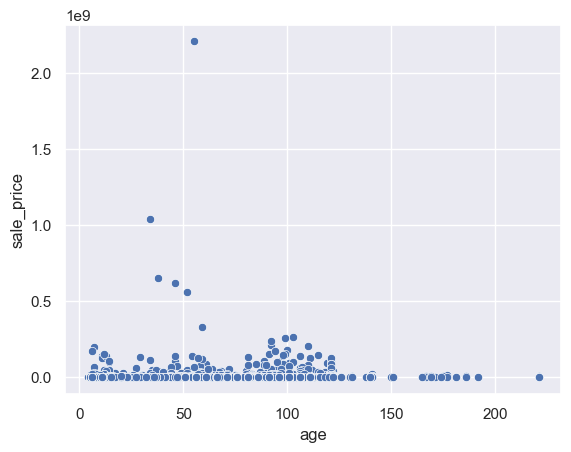

In [43]:
#vizualizing 'age' and 'sale_price'

sns.scatterplot(data = NewYork_data, x="age", y="sale_price")

In [44]:
#remove outlier prices

NewYork_data = NewYork_data[NewYork_data['sale_price'] <500000000]

C:\Users\umama\AppData\Local\Temp\ipykernel_15096\1842366322.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(NewYork_data['sale_price'], kde = True, hist_kws=dict(edgecolor="k"))


<Axes: xlabel='sale_price', ylabel='Density'>

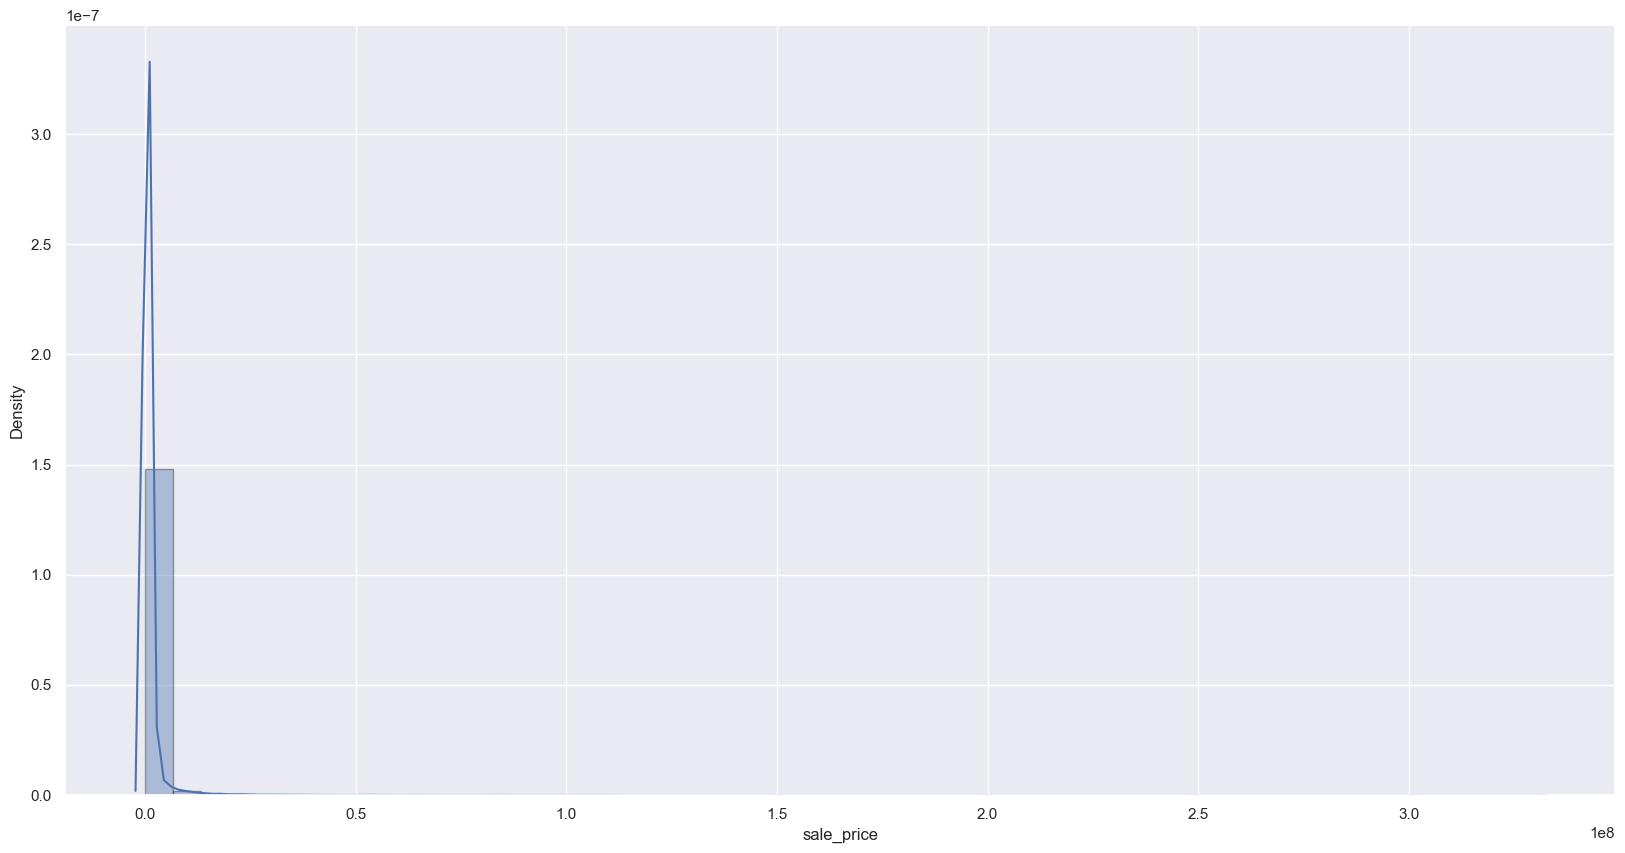

In [45]:
#creating distribution plot of housing sale prices below $500,000,000

plt.figure(figsize = (20,10))
sns.distplot(NewYork_data['sale_price'], kde = True, hist_kws=dict(edgecolor="k"))

<Axes: xlabel='age', ylabel='sale_price'>

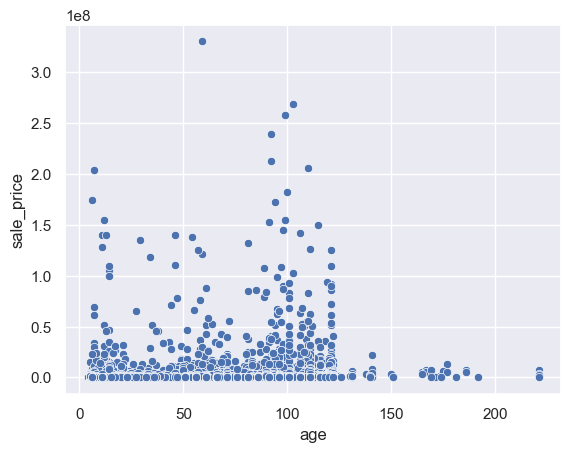

In [46]:
#vizualizing 'age' and 'sale_price'with 'sale_price' less than 500000000

sns.scatterplot(data=NewYork_data, x="age", y="sale_price")

# ED ANALYSIS

C:\Users\umama\AppData\Local\Temp\ipykernel_15096\4128244612.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(NewYork_data['sale_price'], kde = True, hist_kws=dict(edgecolor="k"))


<Axes: xlabel='sale_price', ylabel='Density'>

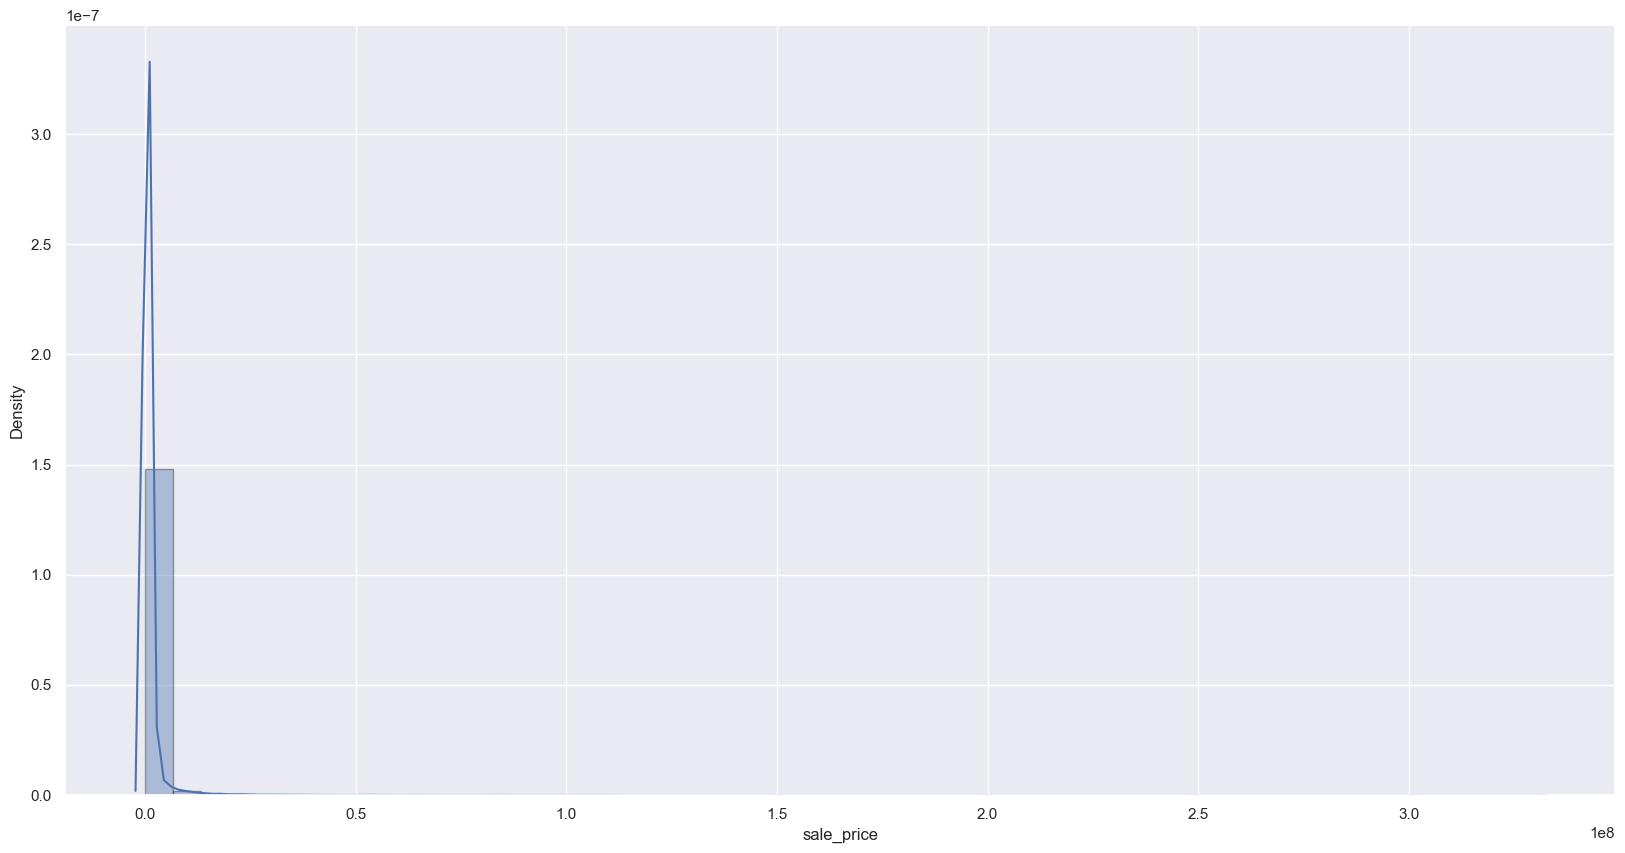

In [47]:
#create distribution plot of housing sale prices below $500,000,000

plt.figure(figsize = (20,10))
sns.distplot(NewYork_data['sale_price'], kde = True, hist_kws=dict(edgecolor="k"))

In [48]:
#create new df where sale_price is not 0 and below $5 mil.

new_data = NewYork_data[(NewYork_data['sale_price'] <5000000) & (NewYork_data['sale_price'] != 0)]

<Axes: xlabel='age', ylabel='sale_price'>

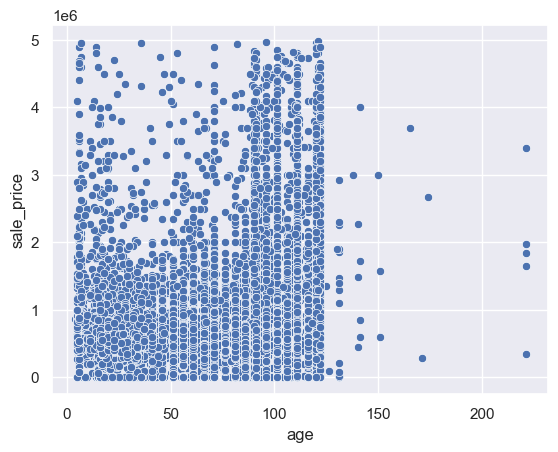

In [49]:
sns.scatterplot(data=new_data, x="age", y="sale_price")

C:\Users\umama\AppData\Local\Temp\ipykernel_15096\62430611.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['sale_price'], kde = True, hist_kws=dict(edgecolor="k"))


<Axes: xlabel='sale_price', ylabel='Density'>

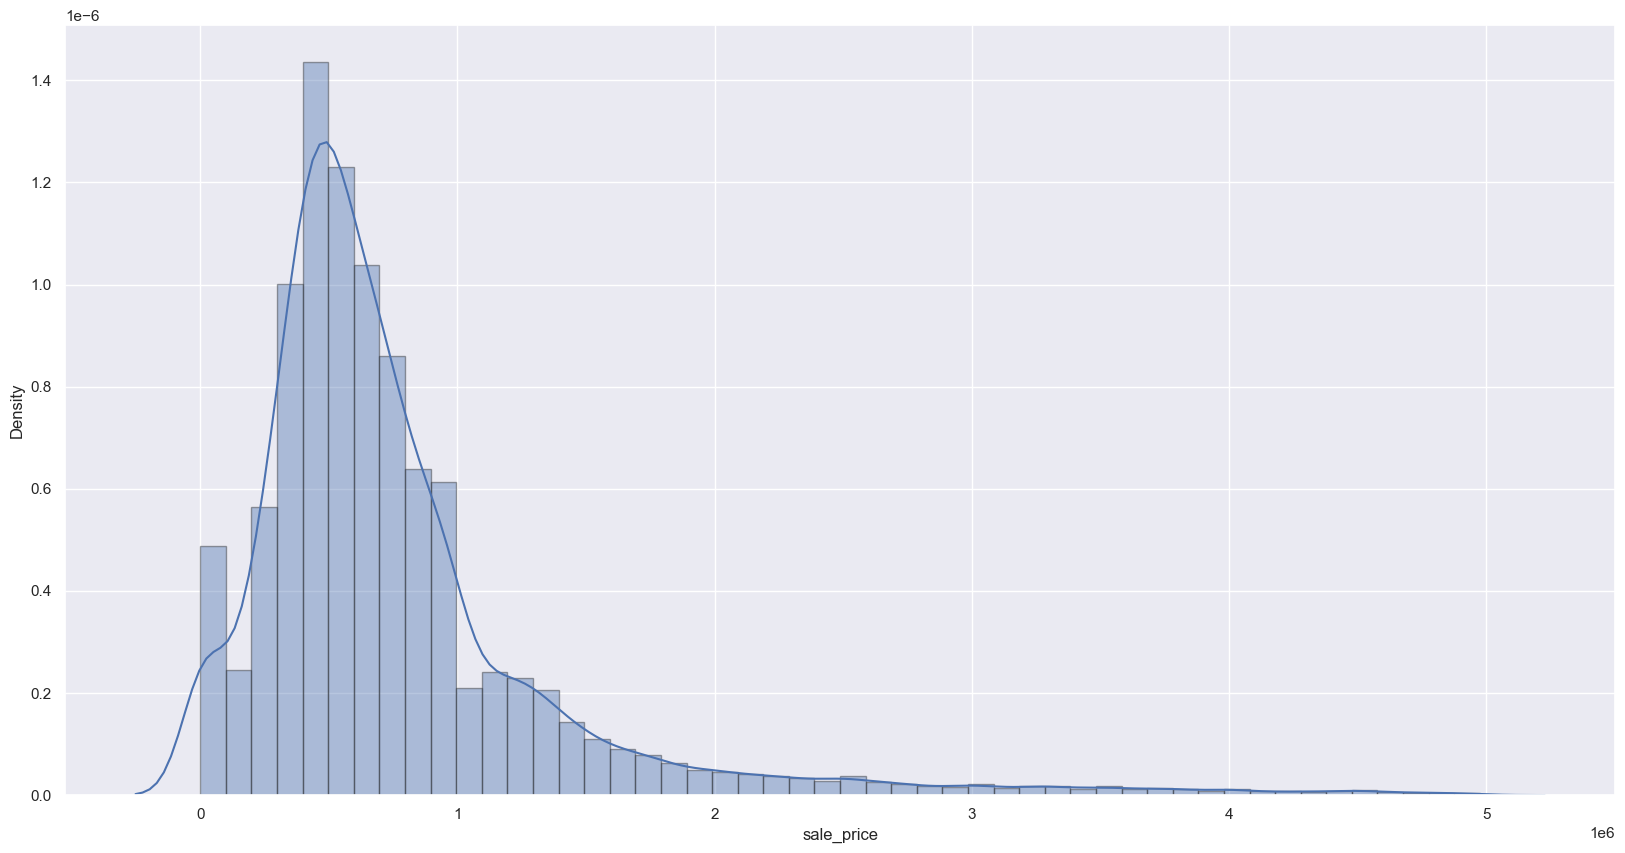

In [50]:
#creating distribution plot of housing sale prices below $500,000,000

plt.figure(figsize = (20,10))
sns.distplot(new_data['sale_price'], kde = True, hist_kws=dict(edgecolor="k"))

In [51]:
new_data.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,min,25%,50%,75%,max,std
residential_units,28207.00000,2.17109,0.00000,1.00000,2.00000,2.00000,1844.00000,13.33397
commercial_units,28207.00000,0.20470,0.00000,0.00000,0.00000,0.00000,2261.00000,13.51836
total_units,28207.00000,2.37462,0.00000,1.00000,2.00000,2.00000,2261.00000,19.07034
land_square_feet,28207.00000,3814.92076,200.00000,2000.00000,2500.00000,3880.00000,4228300.00000,35284.42440
gross_square_feet,28207.00000,3106.44152,120.00000,1348.00000,1827.00000,2530.00000,3750565.00000,26358.64327
year_built,28207.00000,1941.18194,1800.00000,1920.00000,1930.00000,1960.00000,2017.00000,30.44789
sale_price,28207.00000,766102.58606,1.00000,410000.00000,600000.00000,900000.00000,4975000.00000,651702.65398
sale_date,28207.00000,.5f,.5f,.5f,.5f,.5f,.5f,nan
age,28207.00000,79.81806,4.00000,61.00000,91.00000,101.00000,221.00000,30.44789


<Axes: xlabel='land_square_feet', ylabel='sale_price'>

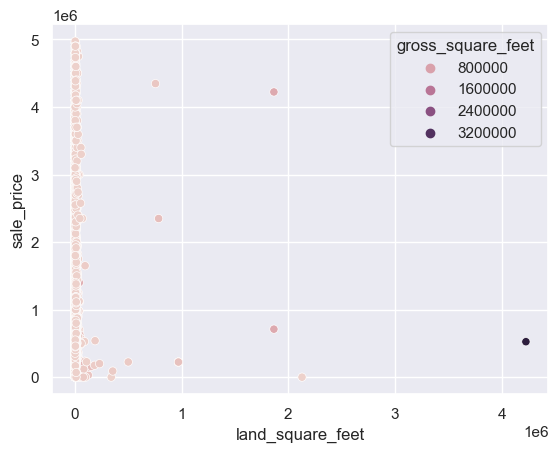

In [52]:
#quick plots of land_square_feet & gross_square_feet against price

sns.scatterplot(data=new_data, x="land_square_feet", y="sale_price", hue = "gross_square_feet")

In [53]:
#creates a filter for land_square_feet where over 1,000,000 SF

land_filt = (new_data['land_square_feet'] > 1000000)

In [54]:
new_data[land_filt]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age
61460,Queens,GLEN OAKS,10 COOPS - ELEVATOR APARTMENTS,2,8489,1,,D4,26910 GRAND CENTRAL PARKWA,,...,22,1866,4228300.0,3750565.0,1972,2,D4,525000.0,2017-07-05,49.0
81334,Staten Island,NEW SPRINGVILLE,22 STORE BUILDINGS,4,2400,180,,K6,2655 RICHMOND AVENUE,,...,126,126,1865243.0,683200.0,1975,4,K6,711008.0,2017-03-17,46.0
81335,Staten Island,NEW SPRINGVILLE,22 STORE BUILDINGS,4,2400,180,,K6,2655 RICHMOND AVENUE,,...,126,126,1865243.0,683200.0,1975,4,K6,4223025.0,2017-03-17,46.0
83181,Staten Island,TODT HILL,33 EDUCATIONAL FACILITIES,4,683,1,,W1,715 OCEAN TERRACE,,...,1,1,2128899.0,240.0,1965,4,W1,1.0,2016-11-14,56.0


In [55]:
#creates a filter for land_square_feet where over 1,000,000 SF

gross_filt = (new_data['gross_square_feet'] > 1000000)

In [56]:
new_data[gross_filt]

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age
61460,Queens,GLEN OAKS,10 COOPS - ELEVATOR APARTMENTS,2,8489,1,,D4,26910 GRAND CENTRAL PARKWA,,...,22,1866,4228300.0,3750565.0,1972,2,D4,525000.0,2017-07-05,49.0


In [57]:
#filtering dataset by removing values that is not within the range

new_data = new_data[(new_data['sale_price'] <5000000) #limit up to $5,000,000 
                       & (new_data['sale_price'] > 1000) #removes all properties less than $1,000
                       & (new_data['residential_units'] < 500) #limit up to 500 units
                       & (new_data['commercial_units'] < 500) #limit up to 500 units
                       & (new_data['land_square_feet'] < new_data['gross_square_feet'])] 

In [58]:
#removing duplicates

new_data.drop_duplicates()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,...,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,108.0
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,101.0
172,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,391,19,,S3,624 EAST 9TH STREET,,...,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,111.0
174,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,394,5,,S5,183 AVENUE B,,...,1,6,1779.0,3713.0,1910,2,S5,4750000.0,2017-04-03,111.0
195,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,390,34,,K4,115 AVENUE C,,...,1,1,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28,122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84487,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,7317,246,,A5,61 PEMBROOK LOOP,,...,0,1,1428.0,2206.0,1992,1,A5,470000.0,2017-05-04,29.0
84488,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,7317,280,,A5,131 PEMBROOK LOOP,,...,0,1,1669.0,1828.0,1993,1,A5,425000.0,2017-07-10,28.0
84489,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,7317,311,,A5,203 PEMBROOK LOOP,,...,0,1,1360.0,1672.0,1992,1,A5,354000.0,2016-09-12,29.0
84493,Staten Island,WOODROW,01 ONE FAMILY DWELLINGS,1,7349,58,,A5,22 QUAIL LANE,,...,0,1,2000.0,2059.0,1998,1,A5,549000.0,2017-05-11,23.0


In [59]:
#summary of the data

new_data.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
residential_units,7607.0,3.673064,0.0,2.0,2.0,3.0,462.0,13.575433
commercial_units,7607.0,0.266202,0.0,0.0,0.0,0.0,35.0,1.012149
total_units,7607.0,3.938346,0.0,2.0,2.0,3.0,462.0,13.682849
land_square_feet,7607.0,2396.571973,200.0,1700.0,2000.0,2500.0,152000.0,4046.485056
gross_square_feet,7607.0,5269.855265,700.0,2232.0,2870.0,3600.0,600613.0,19276.368203
year_built,7607.0,1936.95307,1800.0,1910.0,1930.0,1960.0,2016.0,35.31782
sale_price,7607.0,1123343.170501,2000.0,515000.0,850000.0,1400000.0,4975000.0,913048.812984
sale_date,7607,2017-02-26 23:25:55.567240704,2016-09-01 00:00:00,2016-11-30 00:00:00,2017-02-27 00:00:00,2017-05-26 00:00:00,2017-08-31 00:00:00,NaN
age,7607.0,84.04693,5.0,61.0,91.0,111.0,221.0,35.31782


C:\Users\umama\AppData\Local\Temp\ipykernel_15096\3330808220.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['sale_price'], kde = True, hist_kws=dict(edgecolor="k"))


<Axes: xlabel='sale_price', ylabel='Density'>

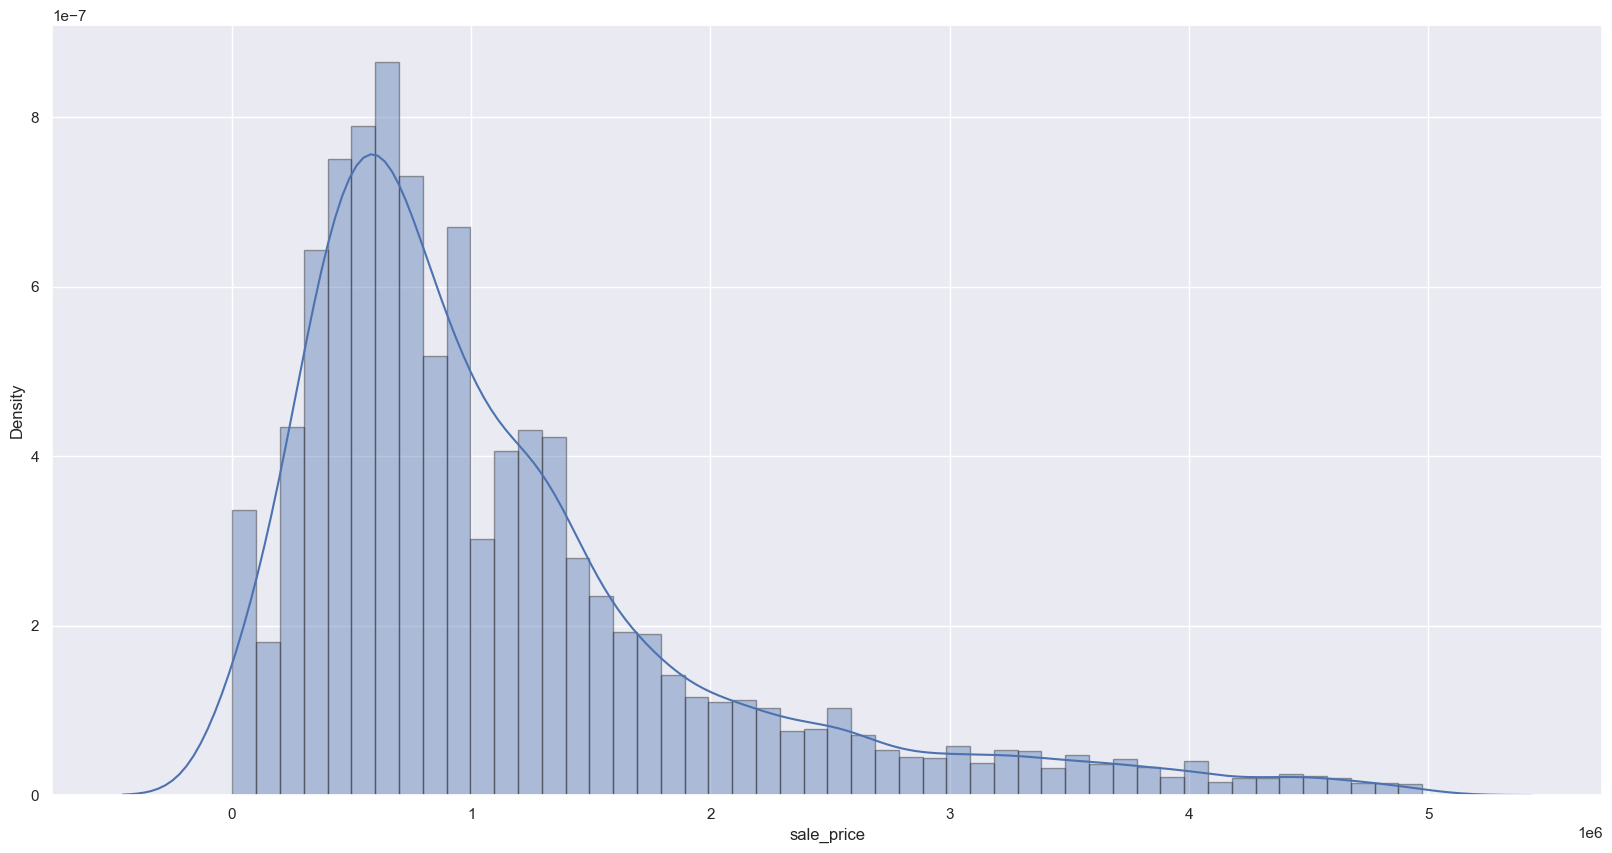

In [60]:
plt.figure(figsize = (20,10))
sns.distplot(new_data['sale_price'], kde = True, hist_kws=dict(edgecolor="k"))

# 6. Data Aggregation & Representation

In [61]:
# No additional aggregation needed for this model

# 7. Data Analysis

### PARTITION INTO TRAIN AND TEST

In [62]:
#importing libraries

from sklearn.model_selection import train_test_split
training_data , testing_data = train_test_split(NewYork_data, test_size=0.3, random_state=39)

In [63]:
# Create features variable 
X = new_data[['residential_units', 'commercial_units', 'total_units', 'land_square_feet',
                'gross_square_feet', 'year_built']]

# Create target variable
y = new_data['sale_price']

# Train, test, split
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X,y, test_size = 0.25, random_state= 10)

### LINEAR REGRESSION

In [64]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression

# Create linear regression object
regressor = LinearRegression()

# Fit model to training data
regressor.fit(X_tr,y_tr)

LinearRegression()

In [65]:
# Predicting test set results

y_pr = regressor.predict(X_te)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

y_train_pred = regressor.predict(X_tr)
y_test_pred = regressor.predict(X_te)

rmse_train = np.sqrt(mean_squared_error(y_tr, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_te, y_test_pred))

# Calculate R-squared on train and test sets
r2_train = r2_score(y_tr, y_train_pred)
r2_test = r2_score(y_te, y_test_pred)

# Print the coefficients (slope and intercept)
print("Coefficient (Slope):", regressor.coef_[0])
print("Intercept:", regressor.intercept_)

# Print RMSE and R-squared scores on train and test sets
print('MAE:',metrics.mean_absolute_error(y_te,y_pr))
print('MSE:',metrics.mean_squared_error(y_te,y_pr))
print("RMSE on Train Set:", rmse_train)
print("RMSE on Test Set:", rmse_test)
print("R-squared on Train Set:", r2_train)
print("R-squared on Test Set:", r2_test)

Coefficient (Slope): 331250.9124024468
Intercept: 10859687.442460658
MAE: 643203.9126975213
MSE: 796704438398.4537
RMSE on Train Set: 877834.9426623622
RMSE on Test Set: 892583.0148498535
R-squared on Train Set: 0.06612722349218891
R-squared on Test Set: 0.07191242066418901


### RANDOM FOREST REGRESSOR

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

rf_reg = RandomForestRegressor()

rf_reg.fit(X_tr, y_tr)

y_pred_rf = rf_reg.predict(X_te)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores_rf = cross_val_score(rf_reg, X_tr, y_tr, cv=5)

In [68]:
print("R^2: {}".format(rf_reg.score(X_te, y_te)))
rmse = np.sqrt(mean_squared_error(y_te, y_pred_rf))
print("Root Mean Squared Error: {}".format(rmse))

#cross-validation

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_rf)))
# Print the 5-fold cross-validation scores
print(cv_scores_rf)


R^2: 0.3473942966717847
Root Mean Squared Error: 748478.914868223
Average 5-Fold CV Score: 0.3461667312679969
[0.32506704 0.32413393 0.3571147  0.3765361  0.34798188]


In [69]:
#interpreting feature importance

importance = pd.DataFrame(list(zip(X_tr.columns, np.transpose(rf_reg.feature_importances_))) \
            ).sort_values(1, ascending=False)
importance

,0,1
4,gross_square_feet,0.484690
3,land_square_feet,0.203043
5,year_built,0.162414
2,total_units,0.068570
0,residential_units,0.057109
1,commercial_units,0.024173


(-1.0, 10.0)

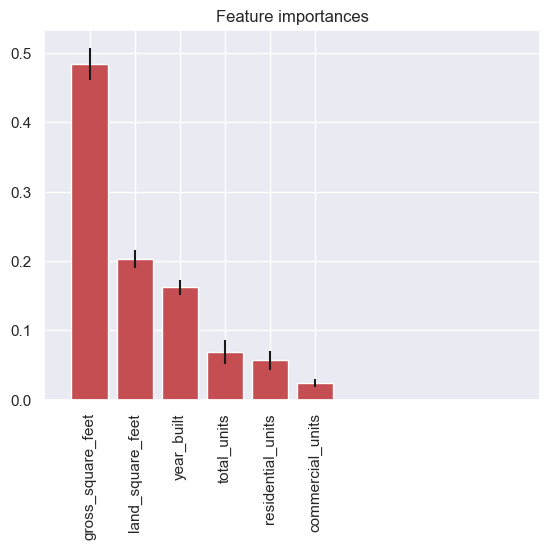

In [70]:
importances = rf_reg.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf_reg.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_tr.shape[1]), importances[indices],  
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_tr.shape[1]),X_tr.columns[indices], rotation=90)
#plt.xlim([-1, X_train_s.shape[1]])
plt.xlim([-1, 10])

In [71]:
print('MAE:',metrics.mean_absolute_error(y_te,y_pr))
print('MSE:',metrics.mean_squared_error(y_te,y_pr))
rmse = np.sqrt(mean_squared_error(y_te, y_pred_rf))
print("RMSE: {}".format(rmse))
print("R^2: {}".format(rf_reg.score(X_te, y_te)))


#cross-validation

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_rf)))
# Print the 5-fold cross-validation scores
print(cv_scores_rf)


MAE: 643203.9126975213
MSE: 796704438398.4537
RMSE: 748478.914868223
R^2: 0.3473942966717847
Average 5-Fold CV Score: 0.3461667312679969
[0.32506704 0.32413393 0.3571147  0.3765361  0.34798188]


### Scalling

In [72]:
#importing standardScalar as we havenot perviously used any scaler

from sklearn.preprocessing import StandardScaler

In [73]:
# Initializing the scaler

scaler = StandardScaler()

In [74]:
# Fiting and transforming the training features

X_train_scaled = scaler.fit_transform(X_tr)

In [75]:
# Transforming the test features
X_test_scaled = scaler.transform(X_te)

In [76]:
# Initializing and training the model with scaled data

model_scaled = RandomForestRegressor()
model_scaled.fit(X_train_scaled, y_tr)

RandomForestRegressor()

In [77]:
# Making predictions on scaled test data

y_pred_scaled = model_scaled.predict(X_test_scaled)

In [78]:
# Calculating and printing accuracy for scaled data

accuracy_scaled = model_scaled.score(X_test_scaled, y_te)
print("Model Accuracy with Scaling:", accuracy_scaled)

Model Accuracy with Scaling: 0.35299433681480363


In [79]:
# Calculating and printing R-squared score for scaled data

r2_scaled = r2_score(y_te, y_pred_scaled)
print("R-squared with Scaling:", r2_scaled)

R-squared with Scaling: 0.35299433681480363


# 8. Data Visualization

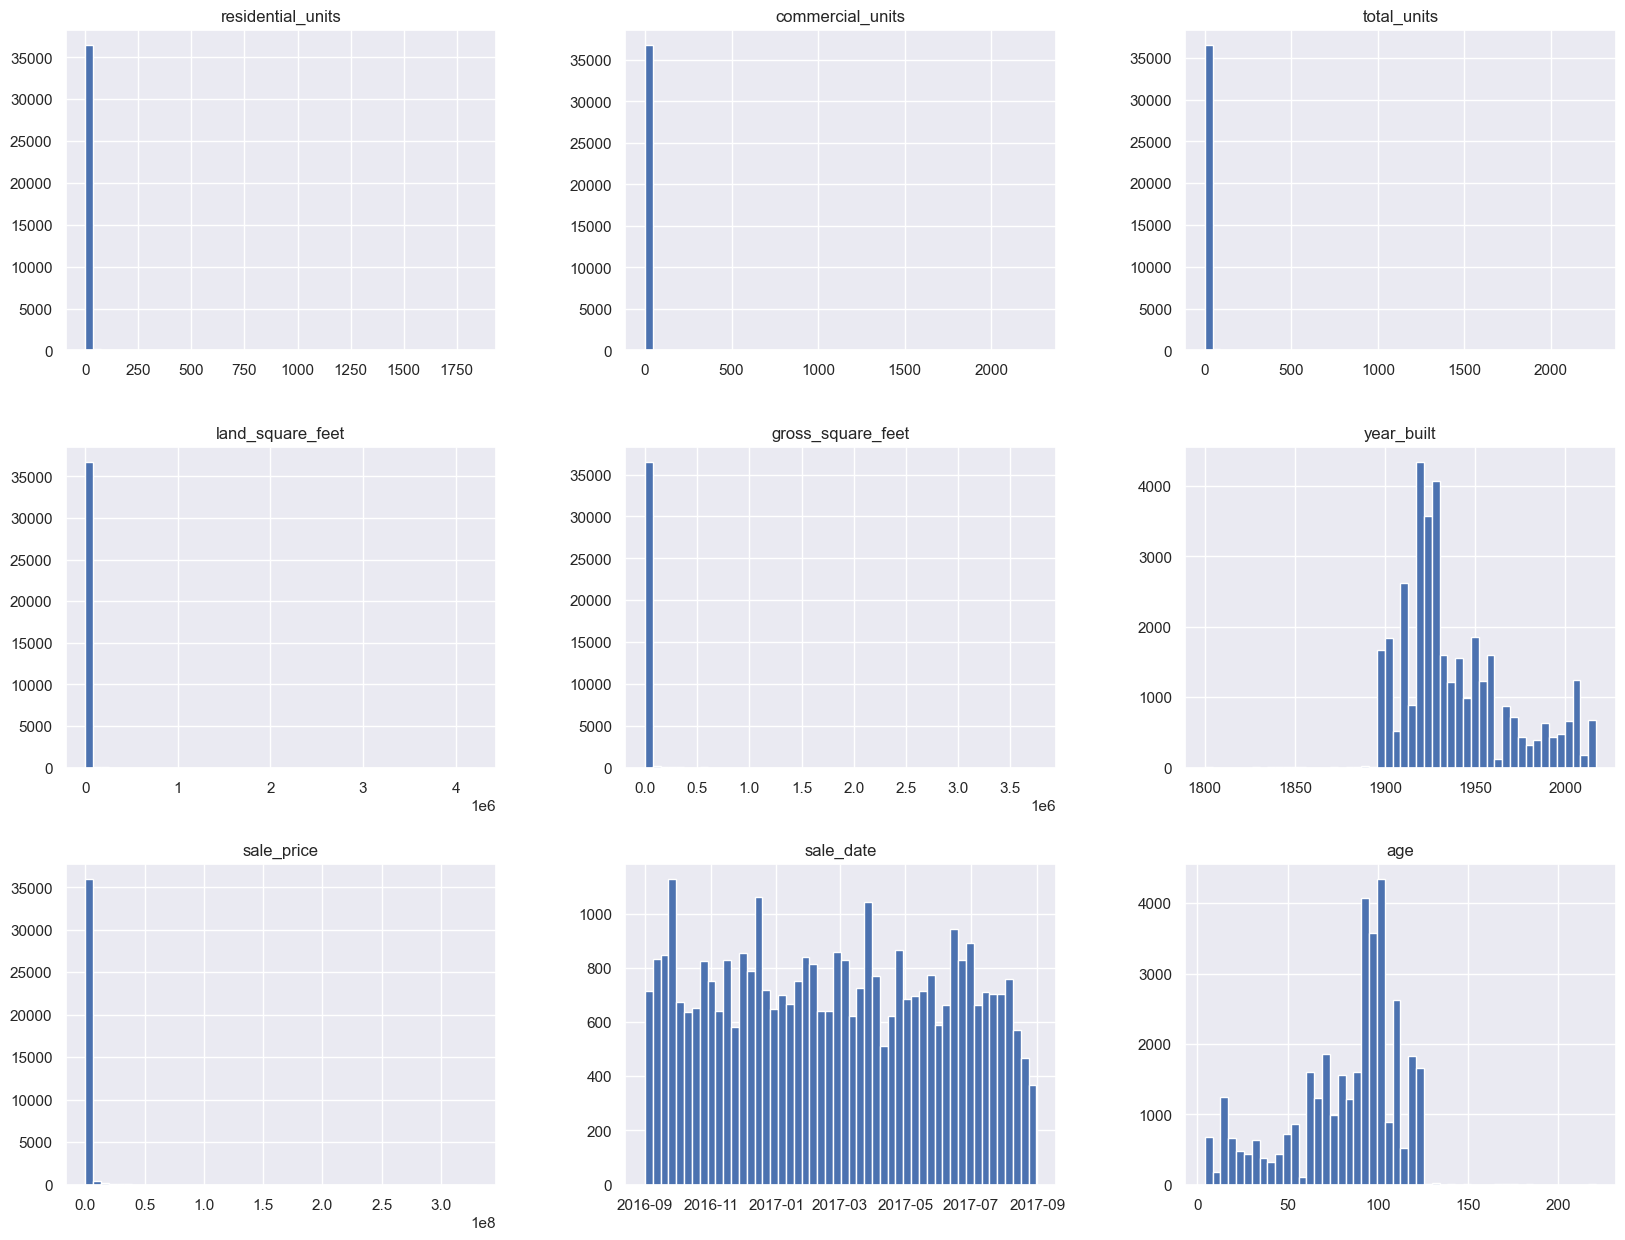

In [80]:
#plotting histogram

NewYork_data.hist(bins=50, figsize=(20,15))
plt.show()

Text(0.5, 1.0, 'Residential Units vs Sale Price')

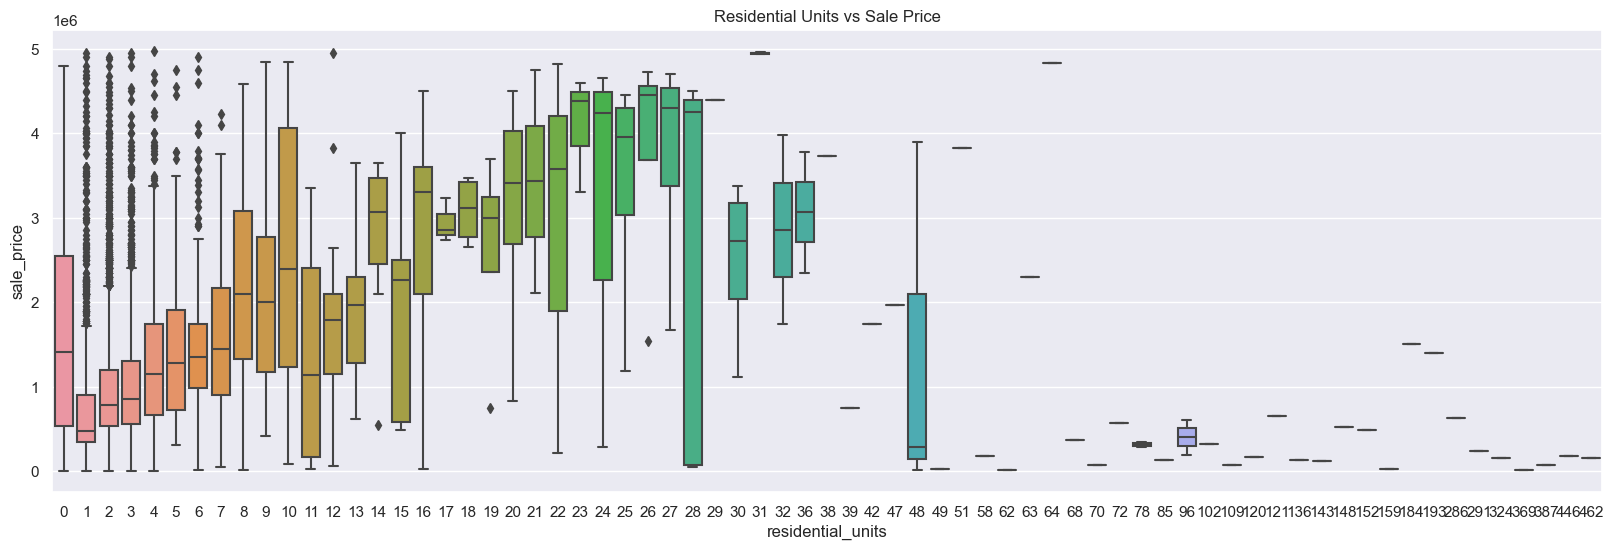

In [81]:
#plot residential units

plt.figure(figsize=(20,6))
sns.boxplot(x='residential_units', y="sale_price", data=new_data)
plt.title('Residential Units vs Sale Price')

Text(0.5, 1.0, 'Commercial Units vs Sale Price')

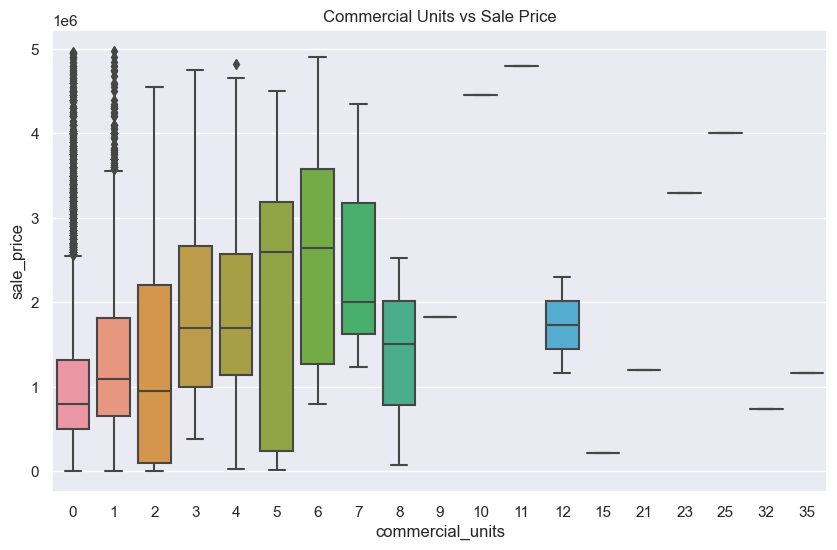

In [82]:
#plot commercial units

plt.figure(figsize=(10,6))
sns.boxplot(x='commercial_units', y="sale_price", data=new_data)
plt.title('Commercial Units vs Sale Price')

#### NUMERICAL FEATURES

Text(0.5, 1.0, 'Age vs. Price')

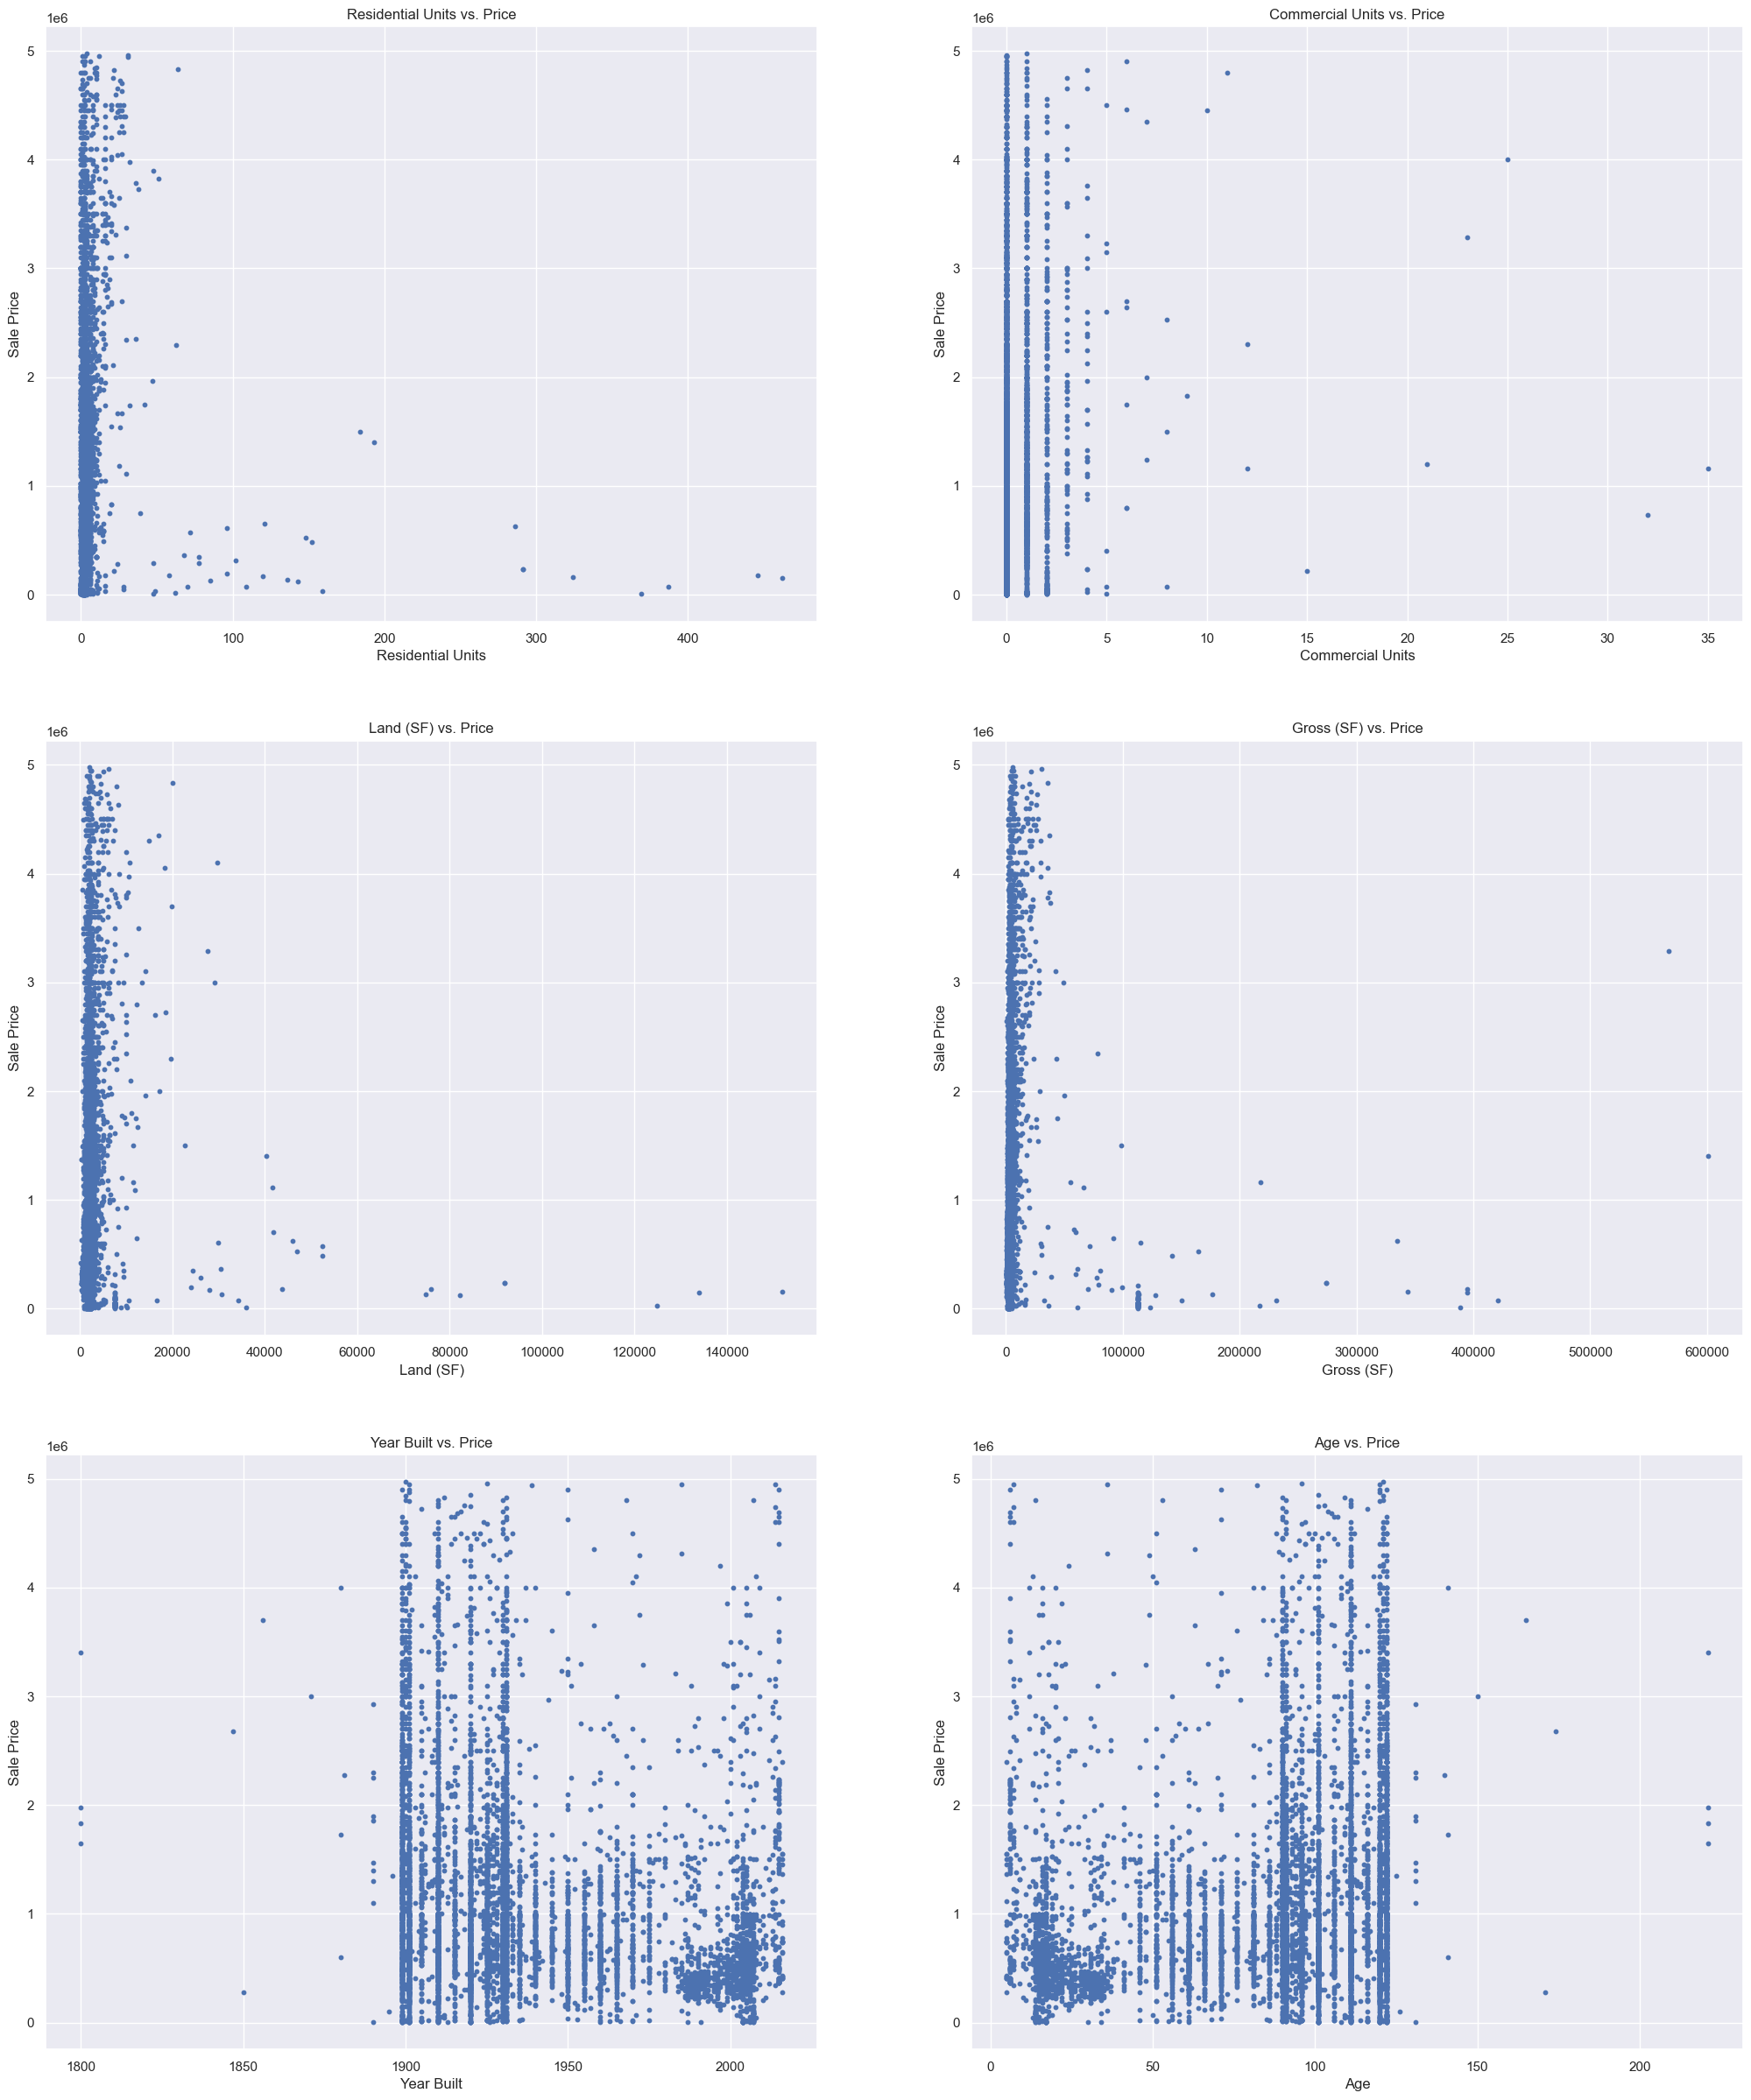

In [83]:
#Suplots of numeric features vs sales price
sns.set_style('darkgrid')
f, axes = plt.subplots(3,2, figsize = (25,30))

# Plot residential units 
axes[0,0].scatter(x = 'residential_units', y = 'sale_price', data = new_data, edgecolor = 'b', s = 10)
axes[0,0].set_xlabel('Residential Units')
axes[0,0].set_ylabel('Sale Price')
axes[0,0].set_title('Residential Units vs. Price')

# Plot commercial units 
axes[0,1].scatter(x = 'commercial_units', y = 'sale_price', data = new_data, edgecolor = 'b', s = 10)
axes[0,1].set_xlabel('Commercial Units')
axes[0,1].set_ylabel('Sale Price')
axes[0,1].set_title('Commercial Units vs. Price')
# Plot land square feet
axes[1,0].scatter(x = 'land_square_feet', y = 'sale_price', data = new_data, edgecolor = 'b', s = 10)
axes[1,0].set_xlabel('Land (SF)')
axes[1,0].set_ylabel('Sale Price')
axes[1,0].set_title('Land (SF) vs. Price')

# Plot gross square feet
axes[1,1].scatter(x = 'gross_square_feet', y = 'sale_price', data = new_data, edgecolor = 'b', s = 10)
axes[1,1].set_xlabel('Gross (SF)')
axes[1,1].set_ylabel('Sale Price')
axes[1,1].set_title('Gross (SF) vs. Price')

# Plot year built
axes[2,0].scatter(x = 'year_built', y = 'sale_price', data = new_data, edgecolor = 'b', s = 10)
axes[2,0].set_xlabel('Year Built')
axes[2,0].set_ylabel('Sale Price')
axes[2,0].set_title('Year Built vs. Price')

# Plot age
axes[2,1].scatter(x = 'age', y = 'sale_price', data = new_data, edgecolor = 'b', s = 10)
axes[2,1].set_xlabel('Age')
axes[2,1].set_ylabel('Sale Price')
axes[2,1].set_title('Age vs. Price')

#### CATEGORICAL FEATURES

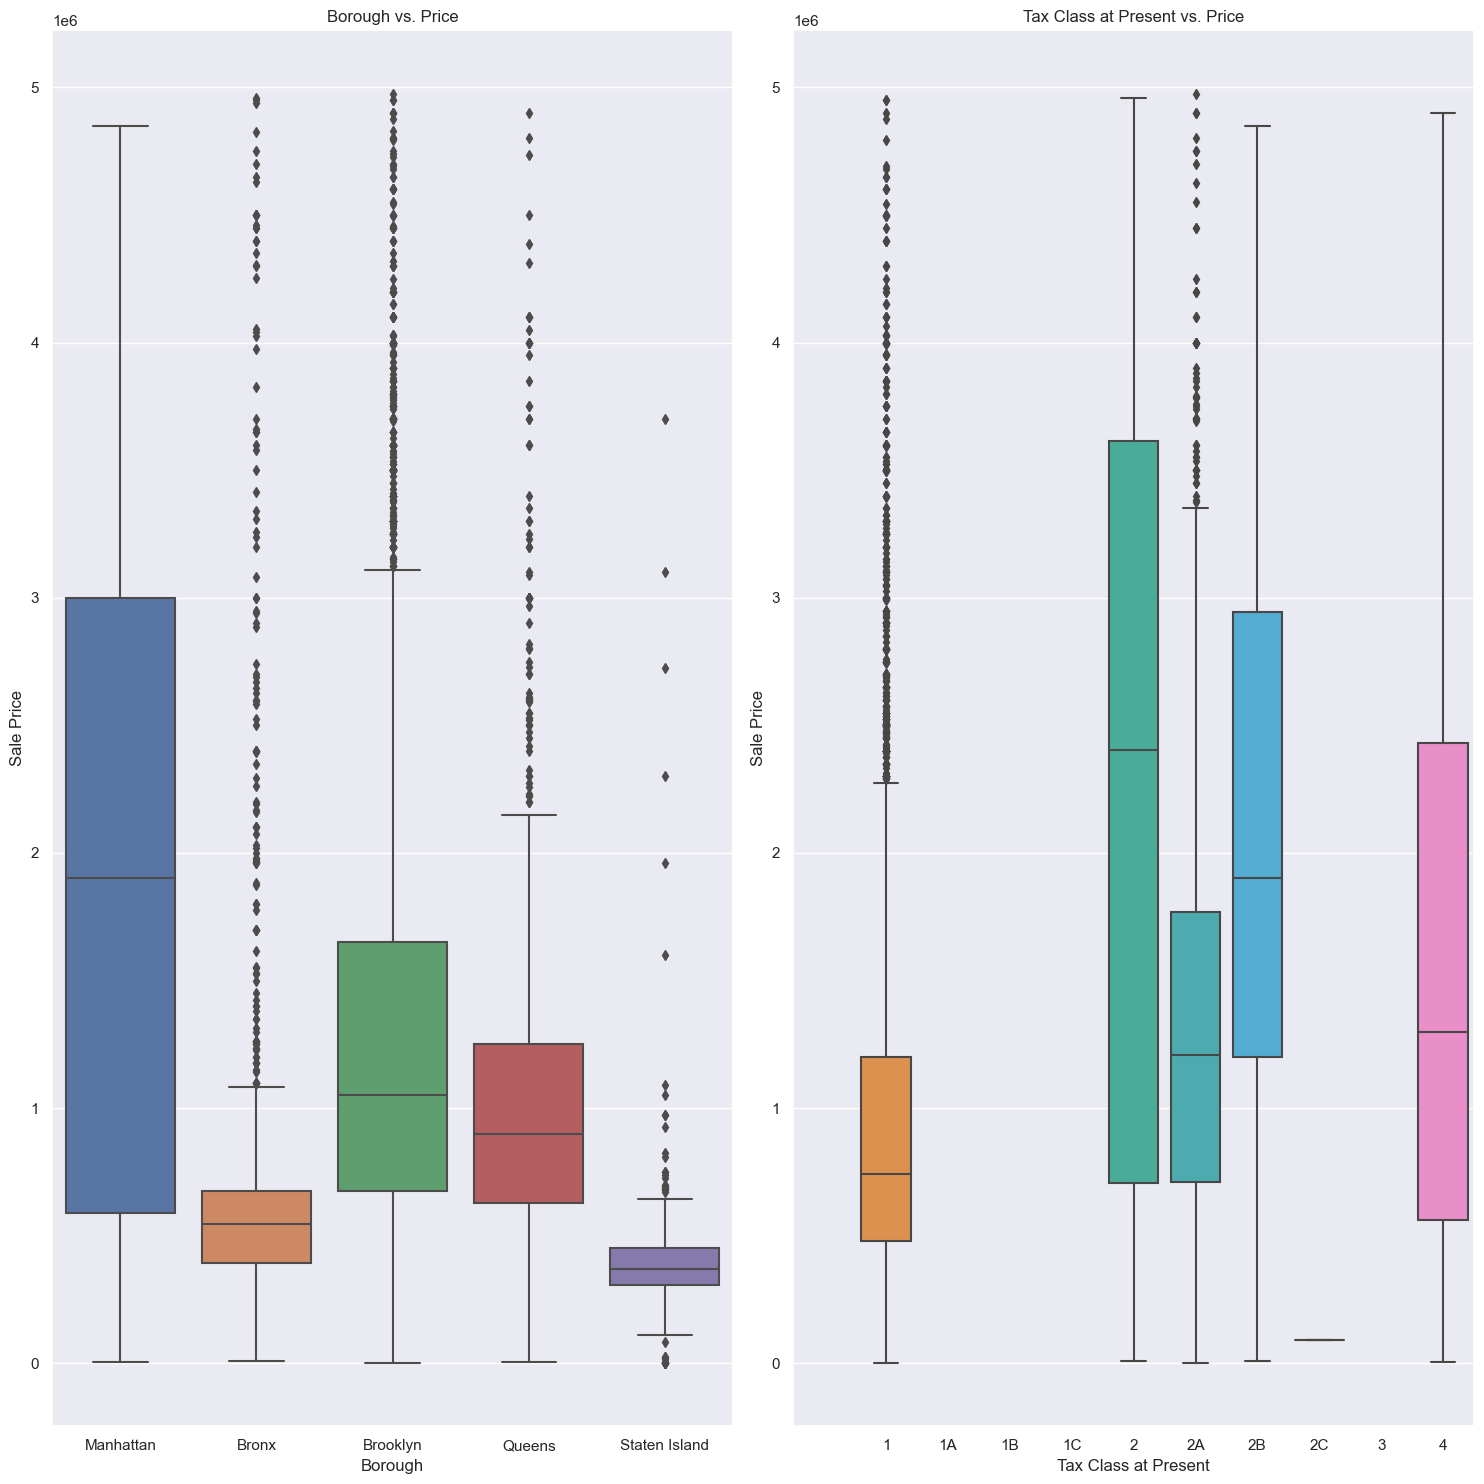

In [84]:
# Suplots of categorical features v price

sns.set_style('darkgrid')
f, axes = plt.subplots(1,2, figsize = (15,15))

#plot of borough category vs price

sns.boxplot(x = 'borough', y = 'sale_price', data = new_data, ax = axes[0])
axes[0].set_xlabel('Borough')
axes[0].set_ylabel('Sale Price')
axes[0].set_title('Borough vs. Price')

#plot of tax class at present vs price

sns.boxplot(x = 'tax_class_at_present', y = 'sale_price', data = new_data, ax = axes[1])
axes[1].set_xlabel('Tax Class at Present')
axes[1].set_ylabel('Sale Price')
axes[1].set_title('Tax Class at Present vs. Price')

plt.tight_layout()
plt.show()

In [85]:
#create new list called 'neighborhood' with top 20 most expensive average sale prices

from collections import Counter
neighborhood = list(dict(Counter(new_data.neighborhood).most_common(20)).keys())

avg_sale_prices = []
for i in neighborhood:
    avg_price = np.mean(new_data.sale_price[new_data.neighborhood == i])
    avg_sale_prices.append(avg_price)

C:\Users\umama\AppData\Local\Temp\ipykernel_15096\2433510648.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x= avg_sale_prices, y= neighborhood , ci=None, palette = "Spectral")


Text(0.5, 1.0, 'Average Property Price in the Top 20 Neighborhoods')

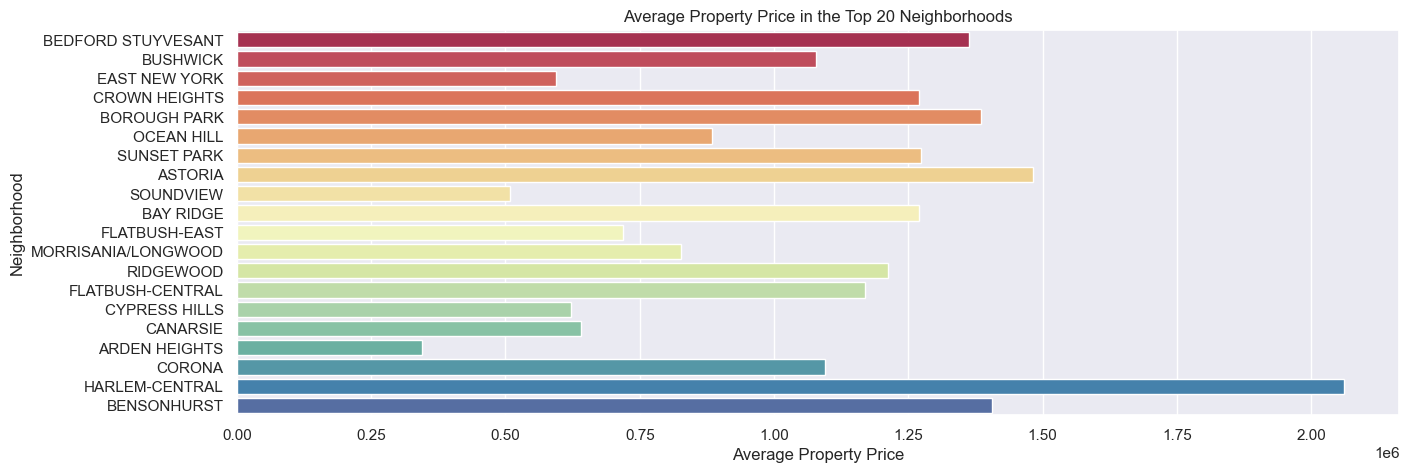

In [86]:
#plot most expensive neighborhoods with highest average property price

plt.figure(figsize=(15,5))

ax = sns.barplot(x= avg_sale_prices, y= neighborhood , ci=None, palette = "Spectral")
ax.set_xlabel('Average Property Price')
ax.set_ylabel('Neighborhood')
plt.title('Average Property Price in the Top 20 Neighborhoods')

Text(0.5, 1.0, 'Variable Correlation')

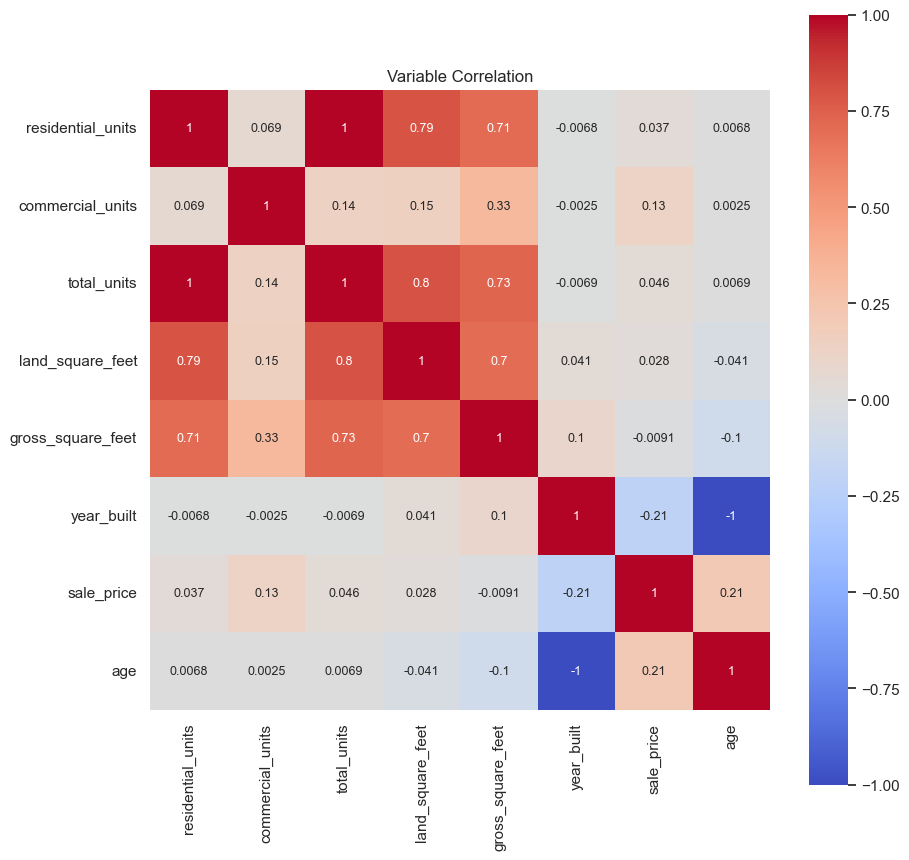

In [87]:
#Variable Correlation

numeric_df = new_data.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', square=True, annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

# 9. Utilization of Analysis Results

In [89]:
#Interpreting the Coefficients

cf = pd.DataFrame(data = regressor.coef_, index = X.columns, columns = ['Coefficients'])
cf

,Coefficients
residential_units,331250.912402
commercial_units,454624.132523
total_units,-325424.491439
land_square_feet,6.439005
gross_square_feet,-5.370648
year_built,-5049.759916


Every one unit:

Residential Units is associated with a increase in Sale Price by $331250.91

Commercial Units is associated with a increase in Sale Price by $454624.13

Total Units is associated with a decrease in Sale Price by $-325424.49

Land Square Foot is associated with a increase in Sale Price by $6.43

Gross Square Foot is associated with a decrease in Sale Price by $-5.37

Year Built is associated with a decrease in Sale Price by $-5049.75